In [4]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split


In [5]:
df = pd.read_csv('../data/churn_train.csv')

In [6]:
df.head(20)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0
5,14.51,5.0,NaN,1.00,Astapor,2014-04-22,iPhone,2014-01-29,0.0,0,True,100.0
6,4.87,4.7,4.0,1.00,Astapor,2014-04-21,Android,2014-01-18,0.0,0,False,66.7
7,1.78,4.0,5.0,1.00,Winterfell,2014-01-12,iPhone,2014-01-11,0.0,3,False,0.0
8,6.87,5.0,4.7,1.00,Astapor,2014-01-30,Android,2014-01-01,0.0,3,False,66.7
9,2.41,5.0,3.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,1,False,100.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_dist                40000 non-null  float64
 1   avg_rating_by_driver    39838 non-null  float64
 2   avg_rating_of_driver    33472 non-null  float64
 3   avg_surge               40000 non-null  float64
 4   city                    40000 non-null  object 
 5   last_trip_date          40000 non-null  object 
 6   phone                   39681 non-null  object 
 7   signup_date             40000 non-null  object 
 8   surge_pct               40000 non-null  float64
 9   trips_in_first_30_days  40000 non-null  int64  
 10  luxury_car_user         40000 non-null  bool   
 11  weekday_pct             40000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [12]:
df['last_trip_copy'] = df['last_trip_date'].copy()

In [13]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,last_trip_copy
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0,2014-05-03
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0,2014-01-26
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,2014-05-21
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,2014-01-10
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,2014-05-13


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_dist                40000 non-null  float64
 1   avg_rating_by_driver    39838 non-null  float64
 2   avg_rating_of_driver    33472 non-null  float64
 3   avg_surge               40000 non-null  float64
 4   city                    40000 non-null  object 
 5   last_trip_date          40000 non-null  object 
 6   phone                   39681 non-null  object 
 7   signup_date             40000 non-null  object 
 8   surge_pct               40000 non-null  float64
 9   trips_in_first_30_days  40000 non-null  int64  
 10  luxury_car_user         40000 non-null  bool   
 11  weekday_pct             40000 non-null  float64
 12  last_trip_copy          40000 non-null  object 
dtypes: bool(1), float64(6), int64(1), object(5)
memory usage: 3.7+ MB


In [16]:
#datetime_index = pd.DatetimeIndex(df['last_trip_copy'])
#data = data.set_index(datetime_index)
# data['year'] = data['dates'].dt.year

# define col as date
df['last_trip_copy'] = pd.to_datetime(df['last_trip_copy'])
df['month'] = df['last_trip_copy'].dt.month

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   avg_dist                40000 non-null  float64       
 1   avg_rating_by_driver    39838 non-null  float64       
 2   avg_rating_of_driver    33472 non-null  float64       
 3   avg_surge               40000 non-null  float64       
 4   city                    40000 non-null  object        
 5   last_trip_date          40000 non-null  object        
 6   phone                   39681 non-null  object        
 7   signup_date             40000 non-null  object        
 8   surge_pct               40000 non-null  float64       
 9   trips_in_first_30_days  40000 non-null  int64         
 10  luxury_car_user         40000 non-null  bool          
 11  weekday_pct             40000 non-null  float64       
 12  last_trip_copy          40000 non-null  dateti

In [19]:
df.head(20)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,last_trip_copy,month
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0,2014-05-03,5
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0,2014-01-26,1
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,2014-05-21,5
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,2014-01-10,1
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,2014-05-13,5
5,14.51,5.0,NaN,1.00,Astapor,2014-04-22,iPhone,2014-01-29,0.0,0,True,100.0,2014-04-22,4
6,4.87,4.7,4.0,1.00,Astapor,2014-04-21,Android,2014-01-18,0.0,0,False,66.7,2014-04-21,4
7,1.78,4.0,5.0,1.00,Winterfell,2014-01-12,iPhone,2014-01-11,0.0,3,False,0.0,2014-01-12,1
8,6.87,5.0,4.7,1.00,Astapor,2014-01-30,Android,2014-01-01,0.0,3,False,66.7,2014-01-30,1
9,2.41,5.0,3.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,1,False,100.0,2014-01-29,1


In [21]:
df['active'] = df['month'] == 6

In [23]:
df.head(20)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,last_trip_copy,month,active
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0,2014-05-03,5,False
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0,2014-01-26,1,False
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,2014-05-21,5,False
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,2014-01-10,1,False
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,2014-05-13,5,False
5,14.51,5.0,NaN,1.00,Astapor,2014-04-22,iPhone,2014-01-29,0.0,0,True,100.0,2014-04-22,4,False
6,4.87,4.7,4.0,1.00,Astapor,2014-04-21,Android,2014-01-18,0.0,0,False,66.7,2014-04-21,4,False
7,1.78,4.0,5.0,1.00,Winterfell,2014-01-12,iPhone,2014-01-11,0.0,3,False,0.0,2014-01-12,1,False
8,6.87,5.0,4.7,1.00,Astapor,2014-01-30,Android,2014-01-01,0.0,3,False,66.7,2014-01-30,1,False
9,2.41,5.0,3.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,1,False,100.0,2014-01-29,1,False


In [27]:
df['active'].sum()

14595

14595 active out of 40000 data points

In [28]:
df.corr()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,month,active
avg_dist,1.000000,0.082303,0.036917,-0.079488,-0.102349,-0.135228,0.025824,0.097445,-0.106260,-0.087714
avg_rating_by_driver,0.082303,1.000000,0.118703,0.007859,0.018849,-0.039282,0.010300,0.021552,-0.033624,-0.026518
avg_rating_of_driver,0.036917,0.118703,1.000000,-0.033829,-0.010436,-0.013720,0.001759,0.013224,-0.017347,-0.014615
avg_surge,-0.079488,0.007859,-0.033829,1.000000,0.793842,-0.001829,-0.075544,-0.113054,-0.018927,-0.003430
surge_pct,-0.102349,0.018849,-0.010436,0.793842,1.000000,0.004746,-0.103531,-0.147969,0.000260,0.010170
trips_in_first_30_days,-0.135228,-0.039282,-0.013720,-0.001829,0.004746,1.000000,0.114741,0.049731,0.157331,0.193684
luxury_car_user,0.025824,0.010300,0.001759,-0.075544,-0.103531,0.114741,1.000000,0.033478,0.165209,0.202092
weekday_pct,0.097445,0.021552,0.013224,-0.113054,-0.147969,0.049731,0.033478,1.000000,0.019836,0.002158
month,-0.106260,-0.033624,-0.017347,-0.018927,0.000260,0.157331,0.165209,0.019836,1.000000,0.744651
active,-0.087714,-0.026518,-0.014615,-0.003430,0.010170,0.193684,0.202092,0.002158,0.744651,1.000000


In [34]:
sn.heatmap(df[~last_trip_copy], annot = True)


NameError: name 'last_trip_copy' is not defined

In [179]:
dfcopy = df.drop(columns = ['last_trip_copy', 'signup_date', 'last_trip_date'])
dfcopy.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,month,active
0,6.94,5.0,5.0,1.00,Astapor,Android,0.0,0,False,100.0,5,False
1,8.06,5.0,5.0,1.00,Astapor,Android,0.0,2,True,0.0,1,False
2,21.50,4.0,NaN,1.00,Winterfell,iPhone,0.0,1,True,100.0,5,False
3,9.46,5.0,NaN,2.75,Winterfell,Android,100.0,1,False,100.0,1,False
4,13.77,5.0,NaN,1.00,Winterfell,iPhone,0.0,0,False,100.0,5,False


In [64]:
dfcopy['city'].unique()

array(['Astapor', 'Winterfell', "King's Landing"], dtype=object)

In [180]:
dfcopy = pd.get_dummies(dfcopy, columns = ['phone', 'city'])
dfcopy.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,month,active,phone_Android,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell
0,6.94,5.0,5.0,1.00,0.0,0,False,100.0,5,False,1,0,1,0,0
1,8.06,5.0,5.0,1.00,0.0,2,True,0.0,1,False,1,0,1,0,0
2,21.50,4.0,NaN,1.00,0.0,1,True,100.0,5,False,0,1,0,0,1
3,9.46,5.0,NaN,2.75,100.0,1,False,100.0,1,False,1,0,0,0,1
4,13.77,5.0,NaN,1.00,0.0,0,False,100.0,5,False,0,1,0,0,1


In [160]:
dfcopy.drop(columns = ['city_Winterfell'])

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,month,active,phone_Android,phone_iPhone,city_Astapor,city_King's Landing
0,6.94,5.0,5.0,1.00,0.0,0,False,100.0,5,False,1,0,1,0
1,8.06,5.0,5.0,1.00,0.0,2,True,0.0,1,False,1,0,1,0
2,21.50,4.0,NaN,1.00,0.0,1,True,100.0,5,False,0,1,0,0
3,9.46,5.0,NaN,2.75,100.0,1,False,100.0,1,False,1,0,0,0
4,13.77,5.0,NaN,1.00,0.0,0,False,100.0,5,False,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2.06,4.8,4.3,1.08,9.5,8,False,90.5,4,False,1,0,0,0
39996,2.05,5.0,5.0,1.00,0.0,2,False,85.7,5,False,0,1,0,1
39997,3.04,5.0,5.0,1.00,0.0,3,True,33.3,6,True,1,0,0,0
39998,3.49,4.3,3.3,1.50,40.0,5,False,60.0,2,False,0,1,1,0


319 nan values for phone os (could be blackberry or windows mobile, it is 2014 after all)

In [181]:
dfcopy.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,month,active,phone_Android,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell
0,6.94,5.0,5.0,1.00,0.0,0,False,100.0,5,False,1,0,1,0,0
1,8.06,5.0,5.0,1.00,0.0,2,True,0.0,1,False,1,0,1,0,0
2,21.50,4.0,NaN,1.00,0.0,1,True,100.0,5,False,0,1,0,0,1
3,9.46,5.0,NaN,2.75,100.0,1,False,100.0,1,False,1,0,0,0,1
4,13.77,5.0,NaN,1.00,0.0,0,False,100.0,5,False,0,1,0,0,1


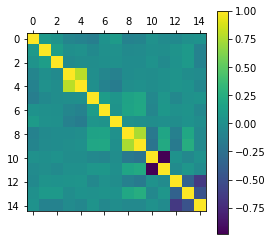

In [72]:
plt.matshow(dfcopy.corr())
cb = plt.colorbar()

In [260]:

dfcopy.corr(method='spearman').style.background_gradient(cmap='coolwarm').set_precision(2)


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,month,active,phone_Android,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell,rating_stated
avg_dist,1.00,0.13,0.03,-0.14,-0.14,-0.11,0.03,0.09,-0.04,-0.03,0.02,-0.02,-0.03,-0.00,0.04,-0.07
avg_rating_by_driver,0.13,1.00,0.15,-0.18,-0.17,-0.28,-0.07,0.06,-0.29,-0.24,0.07,-0.07,0.06,0.07,-0.11,-0.18
avg_rating_of_driver,0.03,0.15,1.00,-0.06,-0.05,-0.09,-0.02,0.02,-0.08,-0.07,0.04,-0.04,0.03,0.09,-0.11,0.19
avg_surge,-0.14,-0.18,-0.06,1.00,0.99,0.26,-0.00,-0.16,0.26,0.23,-0.08,0.08,0.02,0.07,-0.08,0.17
surge_pct,-0.14,-0.17,-0.05,0.99,1.00,0.25,-0.01,-0.16,0.25,0.22,-0.08,0.08,0.02,0.08,-0.08,0.17
trips_in_first_30_days,-0.11,-0.28,-0.09,0.26,0.25,1.00,0.09,-0.05,0.06,0.16,-0.04,0.04,-0.06,-0.01,0.06,0.28
luxury_car_user,0.03,-0.07,-0.02,-0.00,-0.01,0.09,1.00,0.01,0.18,0.20,-0.07,0.06,0.02,0.04,-0.05,0.03
weekday_pct,0.09,0.06,0.02,-0.16,-0.16,-0.05,0.01,1.00,-0.06,-0.06,0.01,-0.01,-0.00,0.02,-0.01,-0.03
month,-0.04,-0.29,-0.08,0.26,0.25,0.06,0.18,-0.06,1.00,0.83,-0.20,0.20,-0.14,0.22,-0.05,0.18
active,-0.03,-0.24,-0.07,0.23,0.22,0.16,0.20,-0.06,0.83,1.00,-0.22,0.22,-0.17,0.25,-0.04,0.15


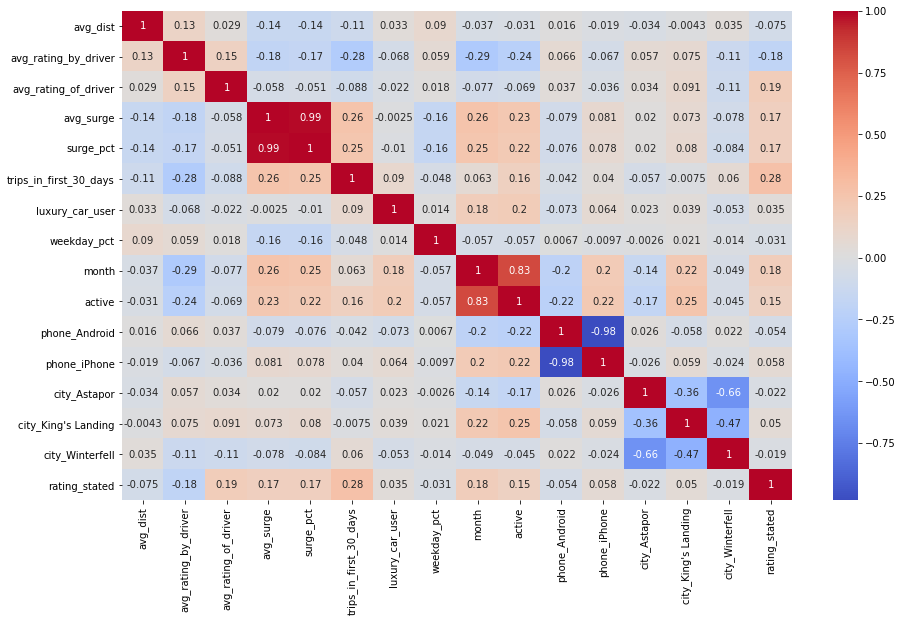

In [263]:
fig, ax = plt.subplots(figsize = (15,9))
sns.heatmap(dfcopy.corr(method ='spearman'), cmap = 'coolwarm', annot = True)
plt.savefig('../images/correlationmatrix.png')

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

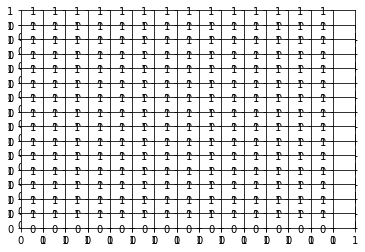

In [78]:
pd.plotting.scatter_matrix(dfcopy, alpha=0.5)



In [161]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_dist                40000 non-null  float64
 1   avg_rating_by_driver    39838 non-null  float64
 2   avg_rating_of_driver    33472 non-null  float64
 3   avg_surge               40000 non-null  float64
 4   surge_pct               40000 non-null  float64
 5   trips_in_first_30_days  40000 non-null  int64  
 6   luxury_car_user         40000 non-null  bool   
 7   weekday_pct             40000 non-null  float64
 8   month                   40000 non-null  int64  
 9   active                  40000 non-null  bool   
 10  phone_Android           40000 non-null  uint8  
 11  phone_iPhone            40000 non-null  uint8  
 12  city_Astapor            40000 non-null  uint8  
 13  city_King's Landing     40000 non-null  uint8  
 14  city_Winterfell         40000 non-null

In [94]:
df_dropnan = dfcopy.copy()

In [182]:
dfcopy['rating_stated'] = ~df['avg_rating_of_driver'].isna()


In [163]:
dfcopy.head(30)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,month,active,phone_Android,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell,rating_stated
0,6.94,5.0,5.0,1.00,0.0,0,False,100.0,5,False,1,0,1,0,0,True
1,8.06,5.0,5.0,1.00,0.0,2,True,0.0,1,False,1,0,1,0,0,True
2,21.50,4.0,NaN,1.00,0.0,1,True,100.0,5,False,0,1,0,0,1,False
3,9.46,5.0,NaN,2.75,100.0,1,False,100.0,1,False,1,0,0,0,1,False
4,13.77,5.0,NaN,1.00,0.0,0,False,100.0,5,False,0,1,0,0,1,False
5,14.51,5.0,NaN,1.00,0.0,0,True,100.0,4,False,0,1,1,0,0,False
6,4.87,4.7,4.0,1.00,0.0,0,False,66.7,4,False,1,0,1,0,0,True
7,1.78,4.0,5.0,1.00,0.0,3,False,0.0,1,False,0,1,0,0,1,True
8,6.87,5.0,4.7,1.00,0.0,3,False,66.7,1,False,1,0,1,0,0,True
9,2.41,5.0,3.0,1.00,0.0,1,False,100.0,1,False,0,1,0,0,1,True


In [87]:
dfcopy.corr(method='spearman').style.background_gradient(cmap='coolwarm').set_precision(2)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,month,active,phone_Android,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell,rating_stated
avg_dist,1.00,0.13,0.05,-0.14,-0.14,-0.10,0.03,0.09,-0.04,-0.03,0.02,-0.02,-0.03,-0.00,0.04,-0.07
avg_rating_by_driver,0.13,1.00,0.22,-0.18,-0.17,-0.28,-0.07,0.06,-0.29,-0.24,0.07,-0.07,0.06,0.07,-0.11,-0.18
avg_rating_of_driver,0.05,0.22,1.00,-0.11,-0.10,-0.17,-0.04,0.03,-0.14,-0.12,0.06,-0.06,0.04,0.08,-0.11,nan
avg_surge,-0.14,-0.18,-0.11,1.00,0.99,0.26,-0.00,-0.16,0.26,0.23,-0.08,0.08,0.02,0.07,-0.08,0.17
surge_pct,-0.14,-0.17,-0.10,0.99,1.00,0.25,-0.01,-0.16,0.25,0.22,-0.08,0.08,0.02,0.08,-0.08,0.17
trips_in_first_30_days,-0.10,-0.28,-0.17,0.26,0.25,1.00,0.09,-0.05,0.06,0.16,-0.04,0.04,-0.06,-0.01,0.06,0.28
luxury_car_user,0.03,-0.07,-0.04,-0.00,-0.01,0.09,1.00,0.01,0.18,0.20,-0.07,0.06,0.02,0.04,-0.05,0.04
weekday_pct,0.09,0.06,0.03,-0.16,-0.16,-0.05,0.01,1.00,-0.06,-0.06,0.01,-0.01,-0.00,0.02,-0.01,-0.03
month,-0.04,-0.29,-0.14,0.26,0.25,0.06,0.18,-0.06,1.00,0.83,-0.20,0.20,-0.14,0.22,-0.05,0.18
active,-0.03,-0.24,-0.12,0.23,0.22,0.16,0.20,-0.06,0.83,1.00,-0.22,0.22,-0.17,0.25,-0.05,0.15


In [122]:
df_nanneg = df_dropnan.fillna(-1)


In [123]:
df_nanneg.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,month,active,phone_Android,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell,rating_stated,active_int
0,6.94,5.0,5.0,1.00,0.0,0,False,100.0,5,False,1,0,1,0,0,True,0
1,8.06,5.0,5.0,1.00,0.0,2,True,0.0,1,False,1,0,1,0,0,True,0
2,21.50,4.0,-1.0,1.00,0.0,1,True,100.0,5,False,0,1,0,0,1,False,0
3,9.46,5.0,-1.0,2.75,100.0,1,False,100.0,1,False,1,0,0,0,1,False,0
4,13.77,5.0,-1.0,1.00,0.0,0,False,100.0,5,False,0,1,0,0,1,False,0


In [239]:
df_nanneg.corr(method='spearman').style.background_gradient(cmap='coolwarm').set_precision(2)


AttributeError: 'Styler' object has no attribute 'show'

In [125]:
df_nanneg['active_int'] = df_dropnan['active'].astype('int')

In [126]:
df_nanneg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_dist                40000 non-null  float64
 1   avg_rating_by_driver    40000 non-null  float64
 2   avg_rating_of_driver    40000 non-null  float64
 3   avg_surge               40000 non-null  float64
 4   surge_pct               40000 non-null  float64
 5   trips_in_first_30_days  40000 non-null  int64  
 6   luxury_car_user         40000 non-null  bool   
 7   weekday_pct             40000 non-null  float64
 8   month                   40000 non-null  int64  
 9   active                  40000 non-null  bool   
 10  phone_Android           40000 non-null  uint8  
 11  phone_iPhone            40000 non-null  uint8  
 12  city_Astapor            40000 non-null  uint8  
 13  city_King's Landing     40000 non-null  uint8  
 14  city_Winterfell         40000 non-null

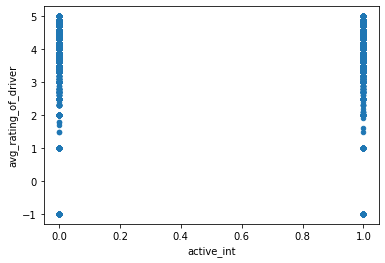

In [127]:
df_nanneg.plot.scatter(x='active_int', y='avg_rating_of_driver')

In [128]:
df_nanneg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_dist                40000 non-null  float64
 1   avg_rating_by_driver    40000 non-null  float64
 2   avg_rating_of_driver    40000 non-null  float64
 3   avg_surge               40000 non-null  float64
 4   surge_pct               40000 non-null  float64
 5   trips_in_first_30_days  40000 non-null  int64  
 6   luxury_car_user         40000 non-null  bool   
 7   weekday_pct             40000 non-null  float64
 8   month                   40000 non-null  int64  
 9   active                  40000 non-null  bool   
 10  phone_Android           40000 non-null  uint8  
 11  phone_iPhone            40000 non-null  uint8  
 12  city_Astapor            40000 non-null  uint8  
 13  city_King's Landing     40000 non-null  uint8  
 14  city_Winterfell         40000 non-null

In [136]:
stat, pvalue = ttest_ind(dfcopy['avg_dist'], dfcopy['avg_rating_of_driver'])

In [137]:
stat, pvalue

(nan, nan)

In [144]:
dfcopy['avg_dist'].mean()

5.791302000000004

In [148]:
df_nanneg[df_nanneg['avg_rating_of_driver'] == -1]['avg_dist'].mean()

7.458337928921606

In [152]:
ttest_ind(df_nanneg['avg_dist'], df_nanneg[df_nanneg['avg_rating_of_driver'] == -1]['avg_dist'], equal_var = False)

Ttest_indResult(statistic=-16.601760294457094, pvalue=7.626466059905339e-61)

In [183]:
dfcopy['avg_rating_of_driver'] = dfcopy['avg_rating_of_driver'].fillna(dfcopy['avg_rating_of_driver'].mean())

In [186]:
dfcopy['avg_rating_by_driver'] =  dfcopy['avg_rating_by_driver'].dropna(axis =0 )

In [192]:
dfcopy = dfcopy.dropna()
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39838 entries, 0 to 39999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_dist                39838 non-null  float64
 1   avg_rating_by_driver    39838 non-null  float64
 2   avg_rating_of_driver    39838 non-null  float64
 3   avg_surge               39838 non-null  float64
 4   surge_pct               39838 non-null  float64
 5   trips_in_first_30_days  39838 non-null  int64  
 6   luxury_car_user         39838 non-null  bool   
 7   weekday_pct             39838 non-null  float64
 8   month                   39838 non-null  int64  
 9   active                  39838 non-null  bool   
 10  phone_Android           39838 non-null  uint8  
 11  phone_iPhone            39838 non-null  uint8  
 12  city_Astapor            39838 non-null  uint8  
 13  city_King's Landing     39838 non-null  uint8  
 14  city_Winterfell         39838 non-null

In [9]:
dfcopy = pd.read_csv('../data/cleaned_churn_train.csv')
dfcopy

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,month,active,phone_Android,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell,rating_stated
0,6.94,5.0,5.000000,1.00,0.0,0,False,100.0,5,False,1,0,1,0,0,True
1,8.06,5.0,5.000000,1.00,0.0,2,True,0.0,1,False,1,0,1,0,0,True
2,21.50,4.0,4.601697,1.00,0.0,1,True,100.0,5,False,0,1,0,0,1,False
3,9.46,5.0,4.601697,2.75,100.0,1,False,100.0,1,False,1,0,0,0,1,False
4,13.77,5.0,4.601697,1.00,0.0,0,False,100.0,5,False,0,1,0,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39833,2.06,4.8,4.300000,1.08,9.5,8,False,90.5,4,False,1,0,0,0,1,True
39834,2.05,5.0,5.000000,1.00,0.0,2,False,85.7,5,False,0,1,0,1,0,True
39835,3.04,5.0,5.000000,1.00,0.0,3,True,33.3,6,True,1,0,0,0,1,True
39836,3.49,4.3,3.300000,1.50,40.0,5,False,60.0,2,False,0,1,1,0,0,True


In [10]:

dfcopy.to_csv('../data/cleaned_churn_train.csv', index = False)

In [11]:
y = dfcopy['active']
X = dfcopy.drop(columns = ['active'])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
X_train.to_csv('../data/cleaned_X_train.csv', index = False)
X_test.to_csv('../data/cleaned_X_test.csv', index = False)
y_train.to_csv('../data/cleaned_y_train.csv', index = False)
y_test.to_csv('../data/cleaned_y_test.csv', index = False)